##### Import Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

##### Modeling data fetching with 'geojson' file

In [2]:
shp_path = 'https://github.com/vuski/admdongkor/raw/master/ver20220701/HangJeongDong_ver20220701.geojson'
dong_gdf = gpd.read_file(shp_path)  

In [3]:
dong_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3513 non-null   int64   
 1   adm_nm    3513 non-null   object  
 2   adm_cd    3513 non-null   object  
 3   adm_cd2   3513 non-null   object  
 4   sgg       3513 non-null   object  
 5   sido      3513 non-null   object  
 6   sidonm    3513 non-null   object  
 7   sggnm     3513 non-null   object  
 8   adm_cd8   3513 non-null   object  
 9   geometry  3513 non-null   geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 274.6+ KB


In [4]:
dong_gdf.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


In [5]:
dong_gdf['sido'].unique()

array(['11', '26', '27', '28', '29', '30', '31', '36', '41', '42', '43',
       '44', '45', '46', '47', '48', '50'], dtype=object)

In [7]:
dong_gdf['sgg'].unique().size

250

In [8]:
unique_dong_gdf = dong_gdf.drop_duplicates(subset='sgg')
unique_dong_gdf

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
17,18,서울특별시 중구 소공동,1102052,1114052000,11140,11,서울특별시,중구,11020520,"MULTIPOLYGON (((126.98109 37.56180, 126.98050 ..."
32,33,서울특별시 용산구 후암동,1103051,1117051000,11170,11,서울특별시,용산구,11030510,"MULTIPOLYGON (((126.98543 37.55374, 126.98781 ..."
48,49,서울특별시 성동구 왕십리2동,1104052,1120052000,11200,11,서울특별시,성동구,11040520,"MULTIPOLYGON (((127.03351 37.56252, 127.03107 ..."
65,66,서울특별시 광진구 화양동,1105053,1121571000,11215,11,서울특별시,광진구,11050530,"MULTIPOLYGON (((127.07406 37.54734, 127.07702 ..."
...,...,...,...,...,...,...,...,...,...,...
3337,3365,경상남도 거창군 거창읍,3839011,4888025000,48880,48,경상남도,거창군,38590110,"MULTIPOLYGON (((127.95605 35.72876, 127.95569 ..."
3349,3377,경상남도 합천군 합천읍,3840011,4889025000,48890,48,경상남도,합천군,38600110,"MULTIPOLYGON (((128.16373 35.65349, 128.16379 ..."
3366,3394,제주특별자치도 제주시 한림읍,3901011,5011025000,50110,50,제주특별자치도,제주시,39010110,"MULTIPOLYGON (((126.23128 33.40475, 126.22994 ..."
3392,3420,제주특별자치도 서귀포시 대정읍,3902011,5013025000,50130,50,제주특별자치도,서귀포시,39020110,"MULTIPOLYGON (((126.26998 33.11245, 126.26956 ..."


In [21]:
# sggnm의 값이 '고흥군'이나 '도양읍'인 경우('고흥'/'도양'이라고 치면 나오지 않음)
dong_gdf[dong_gdf.sggnm.isin(['고흥군', '도양읍'])]

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
2575,2599,전라남도 고흥군 고흥읍,3635011,4677025000,46770,46,전라남도,고흥군,36550110,"MULTIPOLYGON (((127.31575 34.61709, 127.31622 ..."
2576,2600,전라남도 고흥군 도양읍,3635012,4677025300,46770,46,전라남도,고흥군,36550120,"MULTIPOLYGON (((127.27711 34.37894, 127.27693 ..."
2577,2601,전라남도 고흥군 풍양면,3635031,4677031000,46770,46,전라남도,고흥군,36550310,"MULTIPOLYGON (((127.27711 34.56760, 127.27720 ..."
2578,2602,전라남도 고흥군 도덕면,3635032,4677032000,46770,46,전라남도,고흥군,36550320,"MULTIPOLYGON (((127.19955 34.59534, 127.19902 ..."
2579,2603,전라남도 고흥군 금산면,3635033,4677033000,46770,46,전라남도,고흥군,36550330,"MULTIPOLYGON (((127.21444 34.41733, 127.21390 ..."
2580,2604,전라남도 고흥군 도화면,3635034,4677034000,46770,46,전라남도,고흥군,36550340,"MULTIPOLYGON (((127.33165 34.43440, 127.33146 ..."
2581,2605,전라남도 고흥군 포두면,3635035,4677035000,46770,46,전라남도,고흥군,36550350,"MULTIPOLYGON (((127.43769 34.55092, 127.43755 ..."
2582,2606,전라남도 고흥군 봉래면,3635036,4677036000,46770,46,전라남도,고흥군,36550360,"MULTIPOLYGON (((127.49429 34.40001, 127.49675 ..."
2583,2607,전라남도 고흥군 동일면,3635037,4677045000,46770,46,전라남도,고흥군,36550370,"MULTIPOLYGON (((127.46545 34.54380, 127.46577 ..."
2584,2608,전라남도 고흥군 점암면,3635038,4677037000,46770,46,전라남도,고흥군,36550380,"MULTIPOLYGON (((127.44524 34.66266, 127.44559 ..."


In [22]:
# adm_nm에 '고흥'을 포함한 경우
dong_gdf[dong_gdf['adm_nm'].str.contains('고흥')]

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
2575,2599,전라남도 고흥군 고흥읍,3635011,4677025000,46770,46,전라남도,고흥군,36550110,"MULTIPOLYGON (((127.31575 34.61709, 127.31622 ..."
2576,2600,전라남도 고흥군 도양읍,3635012,4677025300,46770,46,전라남도,고흥군,36550120,"MULTIPOLYGON (((127.27711 34.37894, 127.27693 ..."
2577,2601,전라남도 고흥군 풍양면,3635031,4677031000,46770,46,전라남도,고흥군,36550310,"MULTIPOLYGON (((127.27711 34.56760, 127.27720 ..."
2578,2602,전라남도 고흥군 도덕면,3635032,4677032000,46770,46,전라남도,고흥군,36550320,"MULTIPOLYGON (((127.19955 34.59534, 127.19902 ..."
2579,2603,전라남도 고흥군 금산면,3635033,4677033000,46770,46,전라남도,고흥군,36550330,"MULTIPOLYGON (((127.21444 34.41733, 127.21390 ..."
2580,2604,전라남도 고흥군 도화면,3635034,4677034000,46770,46,전라남도,고흥군,36550340,"MULTIPOLYGON (((127.33165 34.43440, 127.33146 ..."
2581,2605,전라남도 고흥군 포두면,3635035,4677035000,46770,46,전라남도,고흥군,36550350,"MULTIPOLYGON (((127.43769 34.55092, 127.43755 ..."
2582,2606,전라남도 고흥군 봉래면,3635036,4677036000,46770,46,전라남도,고흥군,36550360,"MULTIPOLYGON (((127.49429 34.40001, 127.49675 ..."
2583,2607,전라남도 고흥군 동일면,3635037,4677045000,46770,46,전라남도,고흥군,36550370,"MULTIPOLYGON (((127.46545 34.54380, 127.46577 ..."
2584,2608,전라남도 고흥군 점암면,3635038,4677037000,46770,46,전라남도,고흥군,36550380,"MULTIPOLYGON (((127.44524 34.66266, 127.44559 ..."


In [11]:
dong_gdf[dong_gdf['sggnm']=='고흥군']

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
2575,2599,전라남도 고흥군 고흥읍,3635011,4677025000,46770,46,전라남도,고흥군,36550110,"MULTIPOLYGON (((127.31575 34.61709, 127.31622 ..."
2576,2600,전라남도 고흥군 도양읍,3635012,4677025300,46770,46,전라남도,고흥군,36550120,"MULTIPOLYGON (((127.27711 34.37894, 127.27693 ..."
2577,2601,전라남도 고흥군 풍양면,3635031,4677031000,46770,46,전라남도,고흥군,36550310,"MULTIPOLYGON (((127.27711 34.56760, 127.27720 ..."
2578,2602,전라남도 고흥군 도덕면,3635032,4677032000,46770,46,전라남도,고흥군,36550320,"MULTIPOLYGON (((127.19955 34.59534, 127.19902 ..."
2579,2603,전라남도 고흥군 금산면,3635033,4677033000,46770,46,전라남도,고흥군,36550330,"MULTIPOLYGON (((127.21444 34.41733, 127.21390 ..."
2580,2604,전라남도 고흥군 도화면,3635034,4677034000,46770,46,전라남도,고흥군,36550340,"MULTIPOLYGON (((127.33165 34.43440, 127.33146 ..."
2581,2605,전라남도 고흥군 포두면,3635035,4677035000,46770,46,전라남도,고흥군,36550350,"MULTIPOLYGON (((127.43769 34.55092, 127.43755 ..."
2582,2606,전라남도 고흥군 봉래면,3635036,4677036000,46770,46,전라남도,고흥군,36550360,"MULTIPOLYGON (((127.49429 34.40001, 127.49675 ..."
2583,2607,전라남도 고흥군 동일면,3635037,4677045000,46770,46,전라남도,고흥군,36550370,"MULTIPOLYGON (((127.46545 34.54380, 127.46577 ..."
2584,2608,전라남도 고흥군 점암면,3635038,4677037000,46770,46,전라남도,고흥군,36550380,"MULTIPOLYGON (((127.44524 34.66266, 127.44559 ..."


In [16]:
sample_geometry = dong_gdf[dong_gdf.OBJECTID == 2599].geometry

In [17]:
print(sample_geometry)

2575    MULTIPOLYGON (((127.31575 34.61709, 127.31622 ...
Name: geometry, dtype: geometry


In [12]:
goheung_dong_gdf = dong_gdf[dong_gdf.sgg == '46770']

<Axes: >

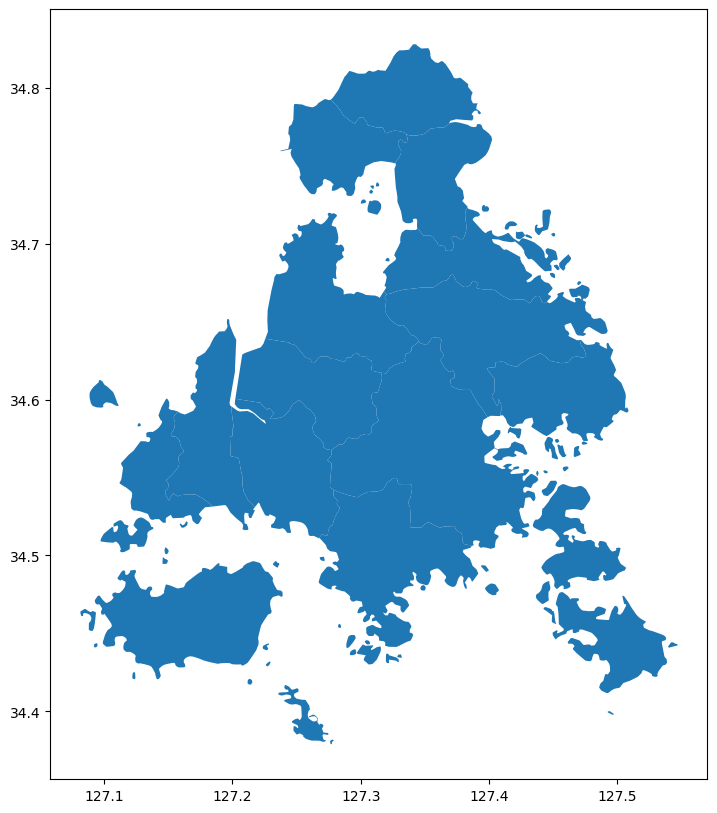

In [13]:
goheung_dong_gdf.plot(figsize=(10,10))